In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
import pyflux as pf

sns.set(style="darkgrid")
%matplotlib inline

In [33]:
data = pd.read_excel('returns_OCT.xlsx', index_col='time')



In [58]:
result = data[exBTC].mul(data['BTC'], axis=0).join(data['BTC'])
result = result.loc[:, (result != 0).any(axis=0)]
result = result.apply(lambda x: (x - np.mean(x))/np.std(x))
result.head()

,ETH,XRP,BCH,LTC,DASH,XEM,BCC,NEO,XMR,ETC,...,EQT,CURE,ZRC,IOP,XTO,NOTE,DYN,TRUST,ABY,BTC
time,,,,,,,,,,,,,,,,,,,,,
2017-08-20 17:00:00,-0.386899,-2.101665,1.476716,-1.302909,-0.785823,1.310872,0.260420,1.841515,-2.674522,0.377825,...,1.816989,0.908866,-0.36605,-1.177443,-0.365841,-0.427669,-0.719246,-0.586206,0.971760,-0.783996
2017-08-20 18:00:00,-0.369934,-2.123358,1.513997,-1.312069,-0.849369,1.296074,0.270026,1.712132,-2.751908,0.340234,...,1.852039,0.988489,-0.36605,-1.164260,-0.364311,-0.473500,-0.813766,-0.604641,0.853331,-0.756942
2017-08-20 19:00:00,-0.366708,-2.064572,1.833177,-1.319165,-0.571621,1.198800,0.343518,1.797321,-2.700764,0.322035,...,1.863152,0.987317,-0.36605,-1.163176,-0.363826,-0.376795,-0.985264,-0.624875,1.051701,-0.748364
2017-08-20 20:00:00,-0.410150,-2.072104,1.852113,-1.309215,-0.664653,1.192308,0.334793,1.778157,-2.721790,0.308065,...,1.832899,0.872407,-0.36605,-1.173845,-0.365146,-0.347878,-0.880654,-0.577281,0.910098,-0.771716
2017-08-20 21:00:00,-0.348266,-2.019147,1.713280,-1.316289,-0.468189,1.286053,0.339224,1.755305,-2.721321,0.344064,...,1.848263,0.957235,-0.36605,-1.175646,-0.364476,-0.320836,-0.867495,-0.594424,0.802184,-0.759856


In [50]:
#result = np.log(data[exBTC].mul(data['BTC'], axis=0).join(data['BTC']))
result = data[exBTC].mul(data['BTC'], axis=0).join(data['BTC'])
result = result.loc[:, (result != 0).any(axis=0)]

some = result.iloc[:, :5]


y = pf.VAR(data=some,lags=2,integ=1)
x = y.fit()
x.summary()

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced ETH,Differenced XRP,Dif Method: OLS                                       
Start Date: 2017-08-20 19:00:00                         Log Likelihood: -11412.9805                       
End Date: 2017-11-12 01:00:00                           AIC: 22965.9609                                   
Number of observations: 1998                            BIC: 23357.9541                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced ETH Constant                 0.0049     0.0764     0.0635   0.9494   (-0.145 | 0.1547)        
Differenced ETH AR(1)                

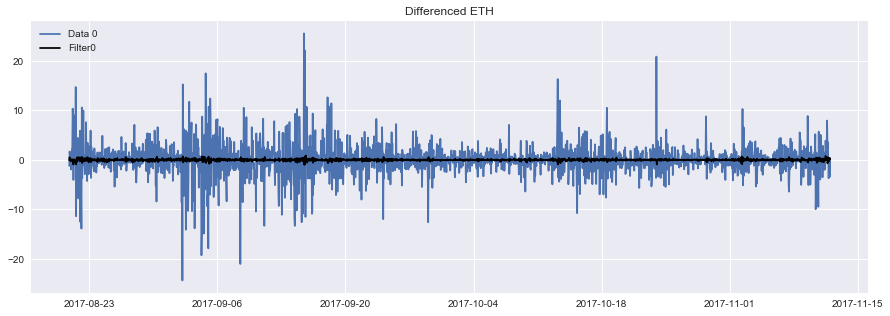

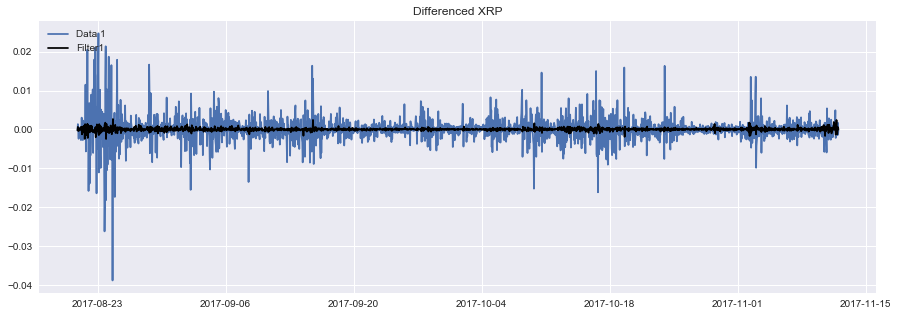

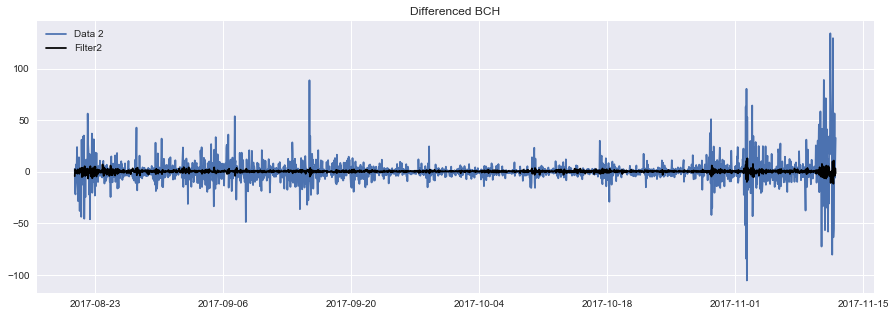

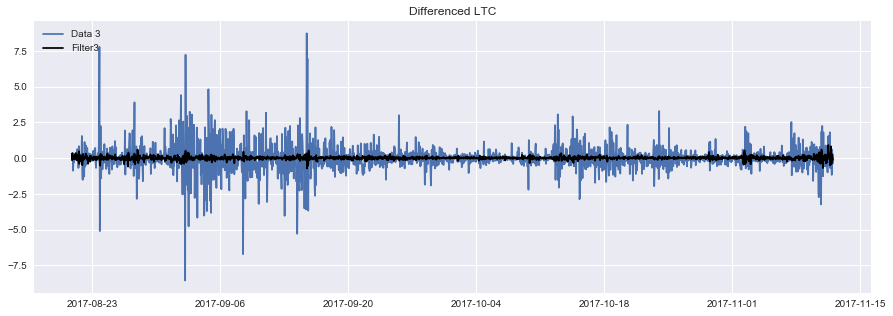

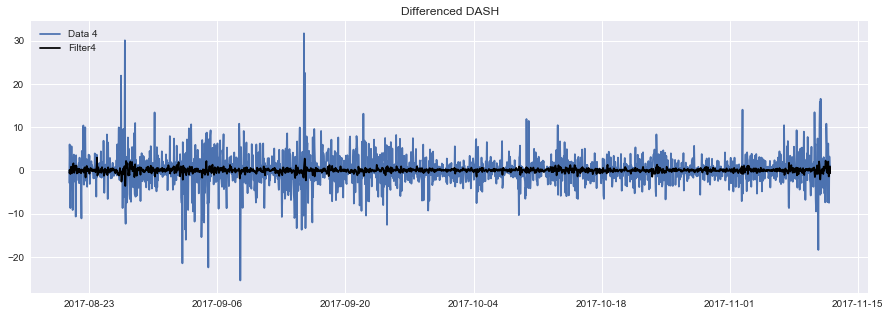

In [51]:
y.plot_fit(figsize=(15,5))

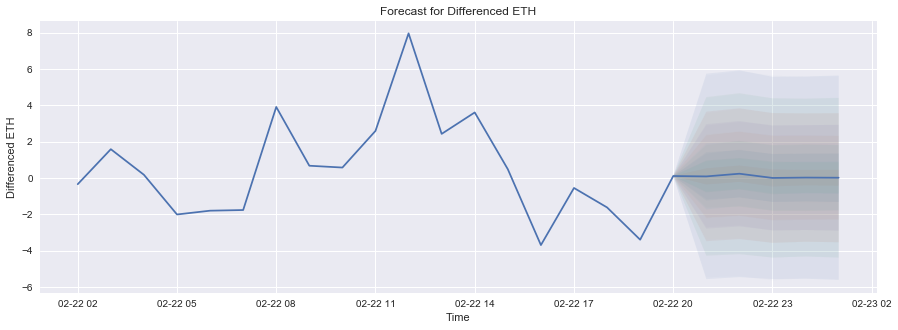

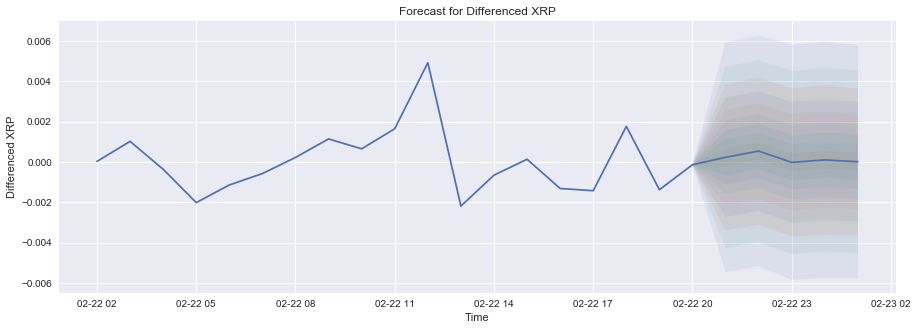

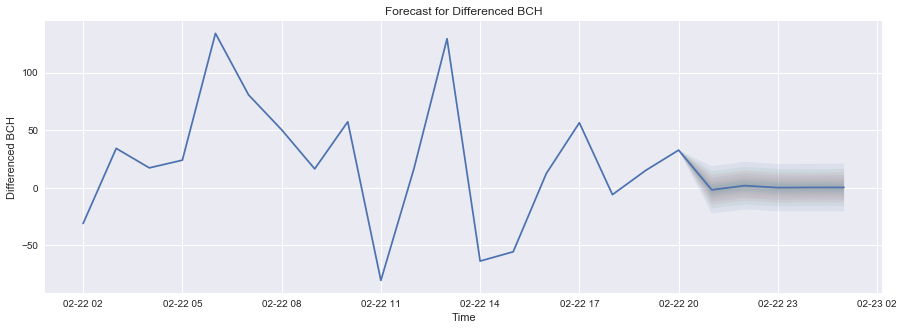

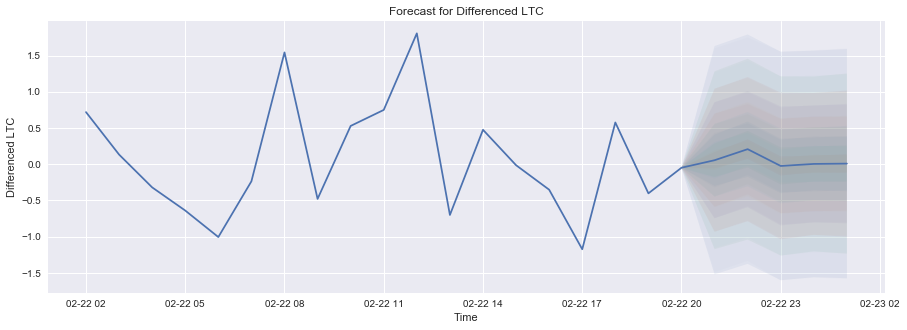

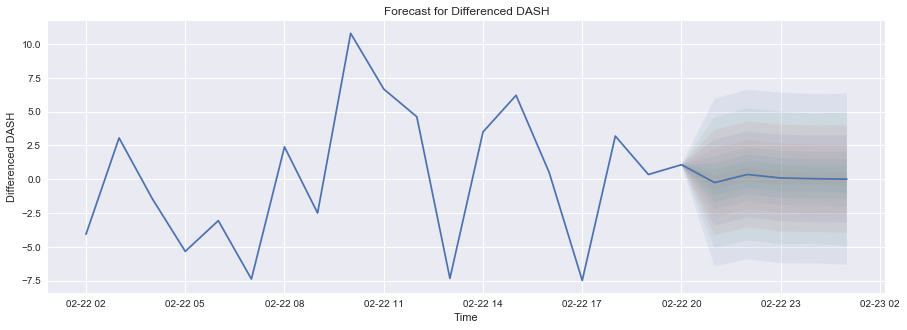

In [52]:
y.plot_predict(past_values=19,h=5,figsize=(15,5))

In [49]:
y.predict(h=6)

,Differenced ETH,Differenced XRP,Differenced BCH,Differenced LTC,Differenced DASH
time,,,,,
2076-12-31 20:00:00,0.000046,0.001121,-0.002654,0.000591,-0.001180
2076-12-31 21:00:00,0.000597,0.001463,0.003764,0.002093,0.000353
2076-12-31 22:00:00,-0.000010,-0.000011,-0.000474,-0.000126,0.000354
2076-12-31 23:00:00,0.000055,0.000452,0.000663,0.000154,0.000142
2077-01-01 00:00:00,0.000013,0.000029,0.000160,0.000106,0.000034
2077-01-01 01:00:00,0.000033,0.000168,0.000346,0.000174,0.000086
